# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

### (1) Definition of probability intervals for assumed probability density function

Assuming gaussian probability distribution with variable sigma

In [2]:
# Variable pdf width!!!
# Absolute precision better for small than for large energy

def sigma(mean):
    sig = np.sqrt(1.+0.1*mean*mean)
    return sig

# Return value of x corresponsing to upper (one-side) limit on given CL
# Use 1-CL for lower limit

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = norm.isf(1-cl)

    return mean+xlim*sigma(mean) 


### (2) Define set of hypothesis

In [3]:
# Considered values of true mean

# vmean = np.linspace(0.,6.0,13)
# vmean = np.linspace(0.,6.0,31)
# vmean = np.linspace(0.,6.0,121)
vmean = np.linspace(0.,6.0,601)

CL = 0.95            # One sided! So the inteval will be 90% CL

# Upper an lower edges of x probability intervals

vhig = problim(vmean,CL)
vlow = problim(vmean,1-CL)


### (3)  Print interval information

In [4]:
print("\nProbability intervals for x:")

print("\n  true mean     x_low     x_high")

for im in range(vmean.size) :
    print ("%10.3f   %8.3f  %8.3f" % (vmean[im],vlow[im],vhig[im]))



Probability intervals for x:

  true mean     x_low     x_high
     0.000     -1.645     1.645
     0.010     -1.635     1.655
     0.020     -1.625     1.665
     0.030     -1.615     1.675
     0.040     -1.605     1.685
     0.050     -1.595     1.695
     0.060     -1.585     1.705
     0.070     -1.575     1.715
     0.080     -1.565     1.725
     0.090     -1.556     1.736
     0.100     -1.546     1.746
     0.110     -1.536     1.756
     0.120     -1.526     1.766
     0.130     -1.516     1.776
     0.140     -1.506     1.786
     0.150     -1.497     1.797
     0.160     -1.487     1.807
     0.170     -1.477     1.817
     0.180     -1.468     1.828
     0.190     -1.458     1.838
     0.200     -1.448     1.848
     0.210     -1.438     1.858
     0.220     -1.429     1.869
     0.230     -1.419     1.879
     0.240     -1.410     1.890
     0.250     -1.400     1.900
     0.260     -1.390     1.910
     0.270     -1.381     1.921
     0.280     -1.371     1.931
     0.2

### (4) Draw probability intervals

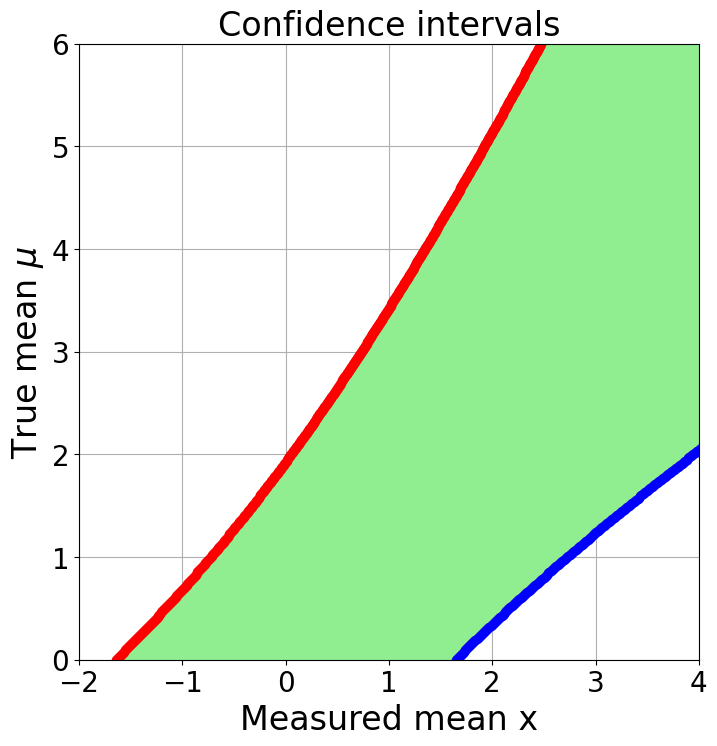

In [5]:
# Plot ranges

Xmin=-2
Xmax=4
Ymin=0
Ymax=6


plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

plt.plot(vlow,vmean,'o',color='red')
plt.plot(vhig,vmean,'o',color='blue')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_interval2_1_'+str(vmean.size)+'.png'
plt.savefig(fname)


### (5) Hypothetical measurement

In [6]:
Xm = 2.3

# Look for limit point in the probability interval tables

iuh = np.argmax(Xm < vhig)
iul = np.argmax(Xm < vlow)

# Interpolate between points for higher precision (linear interpolation)

frac = (Xm-vlow[iul-1])/(vlow[iul]-vlow[iul-1])
ul=frac*vmean[iul]+(1-frac)*vmean[iul-1]
print('Upper limit : %.4f' % (ul))

frac = (Xm-vhig[iuh-1])/(vhig[iuh]-vhig[iuh-1])
ll = frac*vmean[iuh]+(1-frac)*vmean[iuh-1]
print('Lower limit : %.4f' % (ll))

Upper limit : 5.6827
Lower limit : 0.6235


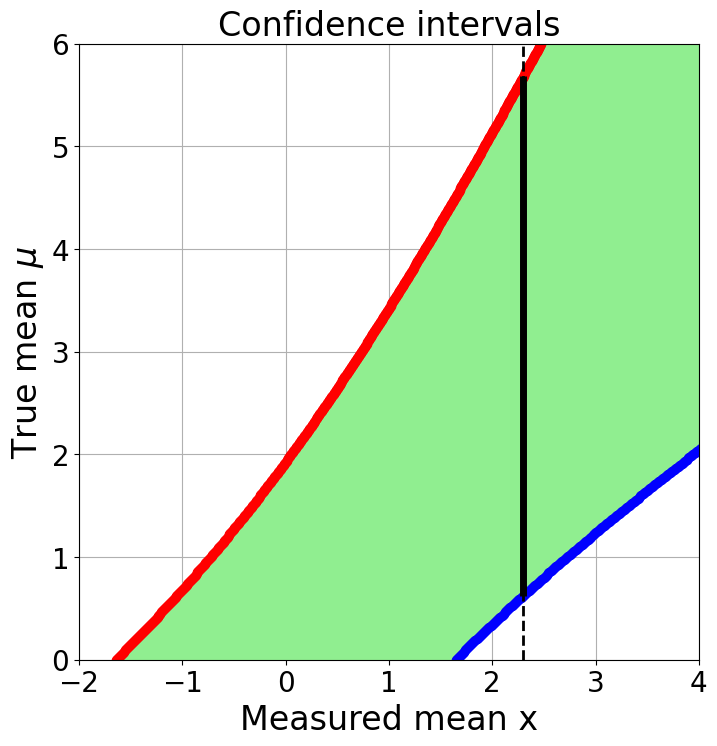

In [7]:
plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

plt.plot(vlow,vmean,'o',color='red')
plt.plot(vhig,vmean,'o',color='blue')

plt.vlines(Xm,Ymin,Ymax,color='black',linewidth=2,linestyles='dashed')
plt.vlines(Xm,ll,ul,color='black',linewidth=5,linestyles='solid')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_interval2_2.png'
plt.savefig(fname)
